In [ ]:
#Day 1 Project Setup
from google.colab import drive
drive.mount('/content/drive')  # Mounts  Google Drive

import pandas as pd

# Setting the file path
file_path = '/content/drive/MyDrive/data_science_salaries/ds_salaries.csv'

# Loading the CSV file from Google Drive
df = pd.read_csv(file_path)

# Display the first few rows
print("The first 5 records are:")
print(df.head())

# Check basic info
print("The basic info is:")
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics for numeric columns
print("The summary statistics is:")
df.describe(include='all')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The first 5 records are:
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_name,job_description,skills
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755,3755,3755,2716
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3,16,6,5
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M,IBM,Manage data pipelines and infrastructure using...,"hadoop, spark, cloud"
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153,254,1067,1067
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN,NaN,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN,NaN,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Day 2: Data Cleaning
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set file paths
input_path = '/content/drive/MyDrive/data_science_salaries/ds_salaries.csv'
output_path = '/content/drive/MyDrive/data_science_salaries/ds_salaries_cleaned.csv'

# Loading the dataset from Google Drive
df = pd.read_csv(input_path)

# Removing duplicate rows
df = df.drop_duplicates()
print(f"After removing duplicates, number of rows: {len(df)}")

# Handling null values (drop rows with any nulls)
df = df.dropna()
print("Null values removed (if any).")

# Standardize text fields: lowercase and strip whitespaces
text_columns = df.select_dtypes(include='object').columns

for col in text_columns:
    df[col] = df[col].astype(str).str.lower().str.strip()

print("Standardized text fields.")

# Filter for only data-related jobs
job_filter_keywords = ['data', 'ml', 'ai', 'analyst', 'scientist', 'engineer']
df = df[df['job_title'].str.contains('|'.join(job_filter_keywords))]

print(f"Filtered dataset size (data-related jobs): {len(df)}")

# Saving cleaned dataset to Google Drive
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
After removing duplicates, number of rows: 3597
Null values removed (if any).
Standardized text fields.
Filtered dataset size (data-related jobs): 2573
Cleaned dataset saved to: /content/drive/MyDrive/data_science_salaries/ds_salaries_cleaned.csv


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1178113572.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




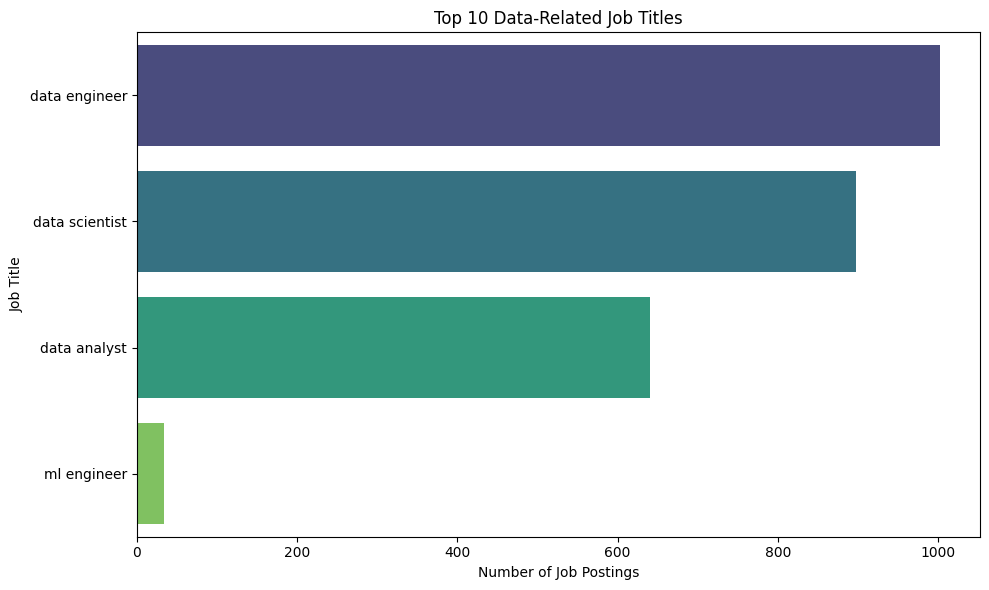

In [ ]:
#Day 3 Top Job Titles
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

# Load the cleaned dataset
file_path = '/content/drive/MyDrive/data_science_salaries/ds_salaries_cleaned.csv'
df = pd.read_csv(file_path)

# Basic cleanup for job titles if needed
df['job_title'] = df['job_title'].str.lower().str.strip()

# Optional: Group similar job titles manually (can be extended with NLP for automation)
def standardize_title(title):
    if 'analyst' in title:
        return 'data analyst'
    elif 'scientist' in title:
        return 'data scientist'
    elif 'ml' in title or 'machine learning' in title:
        return 'ml engineer'
    elif 'engineer' in title:
        return 'data engineer'
    elif 'architect' in title:
        return 'data architect'
    elif 'ai' in title:
        return 'ai specialist'
    elif 'manager' in title:
        return 'data manager'
    elif 'research' in title:
        return 'researcher'
    else:
        return title

df['standard_title'] = df['job_title'].apply(standardize_title)

# Count the top 10 job titles
top_titles = df['standard_title'].value_counts().nlargest(10)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')
plt.title('Top 10 Data-Related Job Titles')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in dataset:
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'company_name',
       'job_description', 'skills'],
      dtype='object')

Unique values in employee_residence:
['ES' 'US' 'CA' 'NG' 'HK' 'IN' 'GB' 'CF' 'AU' 'IE' 'NL' 'CH' 'DE' 'AT'
 'SG' 'SI' 'MX' 'FR' 'UZ' 'BR' 'HR' 'PL' 'KW' 'VN' 'SE' 'CY' 'AR' 'KE'
 'GR' 'LV' 'RO' 'TH' 'PT' 'LT' 'HU' 'SK' 'CN' 'CR' 'TR' 'PH' 'DO' 'PR'
 'BE' 'ID' 'JP' 'PK' 'HN' 'CZ' 'RU' 'DZ' 'UA' 'BG' 'AE' 'JE' 'RS' 'NZ'
 'CL' 'IT' 'MD' 'LU' 'MT']

Unique values in experience_level:
['SE' 'MI' 'EN' 'EX']

Top 10 Hiring Companies (Overall):
  Company  Job_Postings
0     ibm           178
1  airbnb           171
2  swiggy           170
3   intel           170
4  zoma

/tmp/ipython-input-169421933.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




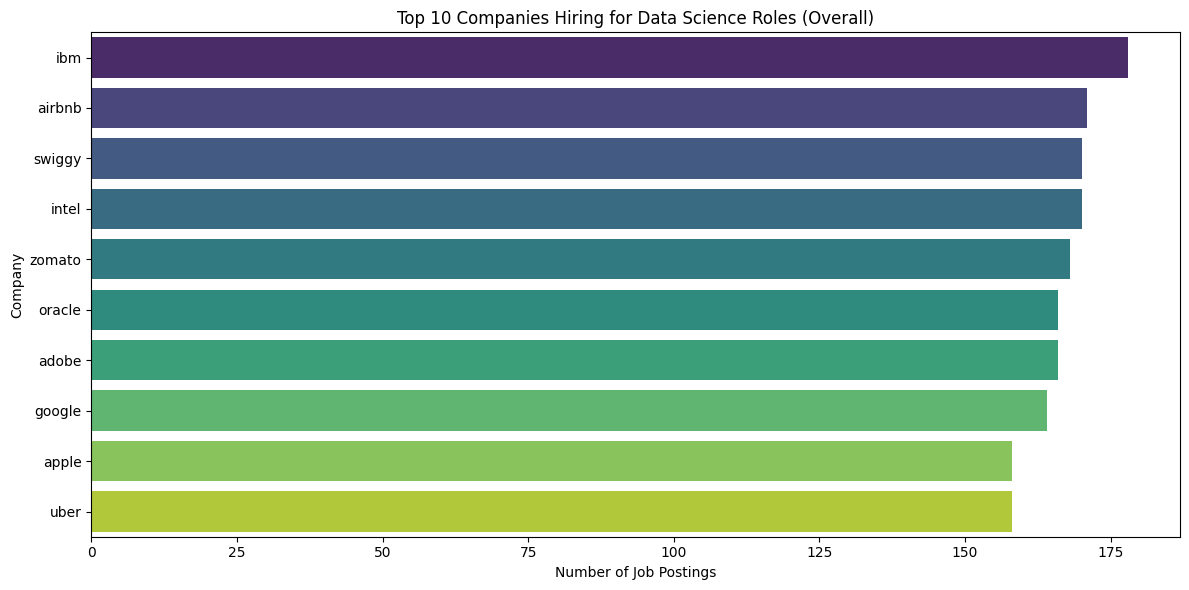


Top 10 Hiring Companies (Senior Level, US):
   Company  Job_Postings
0   airbnb           105
1      ibm           104
2    apple           102
3   zomato           102
4    intel           101
5   google            99
6    adobe            96
7  netflix            95
8   oracle            95
9   amazon            94


/tmp/ipython-input-169421933.py:65: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




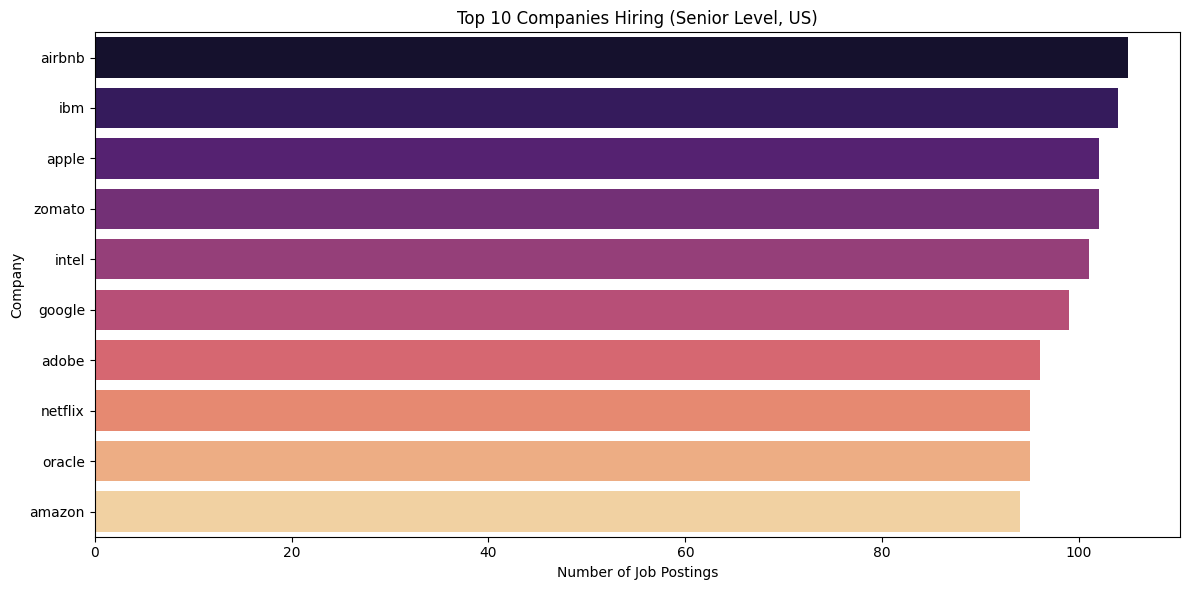

In [ ]:
# Day 4: Top Companies Hiring

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the cleaned dataset
file_path = '/content/drive/MyDrive/data_science_salaries/ds_salaries_cleaned.csv'
df = pd.read_csv(file_path)

# Check column names and sample values
print("Columns in dataset:")
print(df.columns)

# Clean & standardize key columns for safe filtering
df['employee_residence'] = df['employee_residence'].astype(str).str.strip().str.upper()
df['experience_level'] = df['experience_level'].astype(str).str.strip().str.upper()

# Debug: Show unique values for filter columns
print("\nUnique values in employee_residence:")
print(df['employee_residence'].unique())

print("\nUnique values in experience_level:")
print(df['experience_level'].unique())

# Find top companies hiring (overall)
top_companies = df['company_name'].value_counts().reset_index()
top_companies.columns = ['Company', 'Job_Postings']

# Show top 10 hiring companies
print("\nTop 10 Hiring Companies (Overall):")
print(top_companies.head(10))

# Visualization: Top 10 companies hiring overall
plt.figure(figsize=(12, 6))
sns.barplot(data=top_companies.head(10), x='Job_Postings', y='Company', palette='viridis')
plt.title('Top 10 Companies Hiring for Data Science Roles (Overall)')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

# Filter by Region (e.g., United States = 'US') and Seniority (e.g., 'SE')
filtered_df = df[(df['employee_residence'] == 'US') & (df['experience_level'] == 'SE')]

# Check if filtered data is empty
if filtered_df.empty:
    print("\n No records found for employee_residence='US' and experience_level='SE'.")
else:
    # Count top companies in filtered dataset
    filtered_top_companies = filtered_df['company_name'].value_counts().reset_index()
    filtered_top_companies.columns = ['Company', 'Job_Postings']

    # Show top 10 filtered hiring companies
    print("\nTop 10 Hiring Companies (Senior Level, US):")
    print(filtered_top_companies.head(10))

    # Visualization: Top 10 filtered companies
    plt.figure(figsize=(12, 6))
    sns.barplot(data=filtered_top_companies.head(10), x='Job_Postings', y='Company', palette='magma')
    plt.title('Top 10 Companies Hiring (Senior Level, US)')
    plt.xlabel('Number of Job Postings')
    plt.ylabel('Company')
    plt.tight_layout()
    plt.show()


In [ ]:
# Day 5 Location Insights

!pip install wordcloud
!pip install pycountry
import pandas as pd
import plotly.express as px
import pycountry
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/data_science_salaries/ds_salaries_cleaned.csv'
df = pd.read_csv(file_path)

# Clean country names or codes
df['company_location'] = df['company_location'].astype(str).str.strip()

# Function to convert to ISO-3 country code
def get_iso3_code(country):
    try:
        return pycountry.countries.get(alpha_2=country.upper()).alpha_3
    except:
        try:
            return pycountry.countries.get(name=country.title()).alpha_3
        except:
            return None

# Convert to ISO-3
df['iso_code'] = df['company_location'].apply(get_iso3_code)

# Drop rows where conversion failed
df = df.dropna(subset=['iso_code'])

# Count jobs per country
location_counts = df['iso_code'].value_counts().reset_index()
location_counts.columns = ['iso_code', 'job_postings']

# Choropleth map
fig = px.choropleth(
    location_counts,
    locations='iso_code',
    color='job_postings',
    color_continuous_scale='Plasma',
    title='Global Job Hubs for Data Science Roles',
    labels={'job_postings': 'Job Postings'}
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title="Number of Jobs")
)

fig.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounted at /content/drive
Columns in dataset: Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'company_name',
       'job_description', 'skills'],
      dtype='object')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 97.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


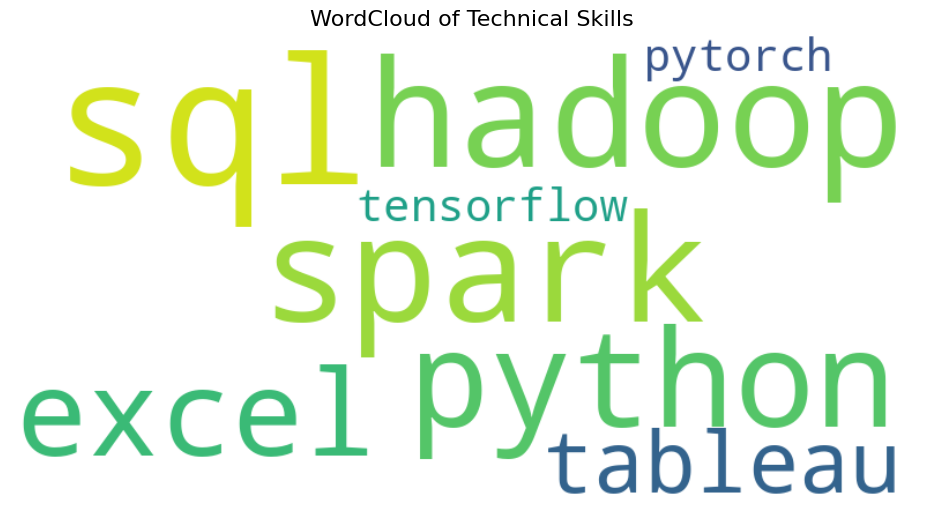

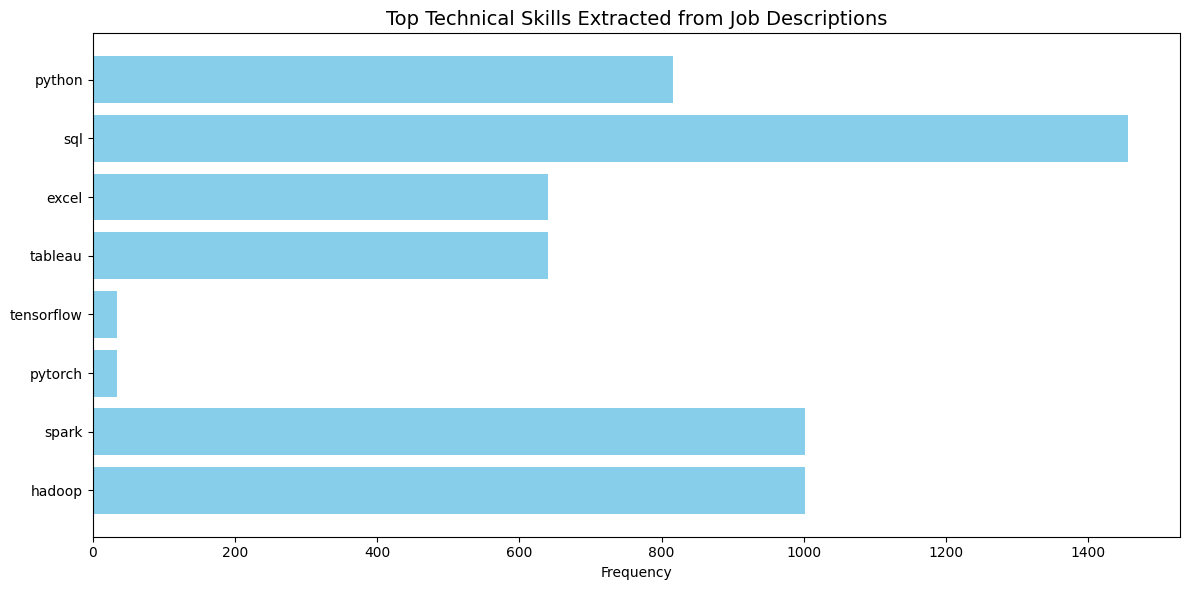

In [1]:
# Day 6: Skill Extraction

# Install required libraries
!pip install spacy wordcloud

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import spacy
from google.colab import drive


drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/data_science_salaries/ds_salaries_cleaned.csv'
df = pd.read_csv(file_path)

# Check dataset columns
print("Columns in dataset:", df.columns)

# Ensure job_description column exists
if 'job_description' not in df.columns:
    raise ValueError("Column 'job_description' is required for this task.")

descriptions = df['job_description'].dropna().astype(str).str.lower()

# Load spaCy Model
!python -m spacy download en_core_web_sm
import en_core_web_sm
nlp = en_core_web_sm.load()

#Define Skill Dictionaries
technical_skills = [
    'python', 'sql', 'excel', 'tableau', 'powerbi', 'tensorflow', 'keras', 'pytorch',
    'nlp', 'machine learning', 'deep learning', 'pandas', 'numpy', 'spark', 'hadoop',
    'scikit-learn', 'matplotlib', 'seaborn', 'aws', 'azure'
]

soft_skills = [
    'communication', 'teamwork', 'leadership', 'creativity', 'adaptability',
    'problem solving', 'critical thinking', 'collaboration'
]

# Tokenize & Lemmatize Descriptions
all_tokens = []
for doc in nlp.pipe(descriptions, disable=["parser", "ner"]):
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    all_tokens.extend(tokens)

# Count token frequencies
token_counts = Counter(all_tokens)

# Extract Skills

found_technical = {skill: token_counts[skill] for skill in technical_skills if skill in token_counts}
found_soft = {skill: token_counts[skill] for skill in soft_skills if skill in token_counts}

# Visualizations

#  WordCloud for Technical Skills
if found_technical:
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wordcloud.generate_from_frequencies(found_technical)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud of Technical Skills', fontsize=16)
    plt.show()

#  Bar Chart – Top Technical Skills
plt.figure(figsize=(12, 6))
plt.barh(list(found_technical.keys()), list(found_technical.values()), color='skyblue')
plt.title('Top Technical Skills Extracted from Job Descriptions', fontsize=14)
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         1

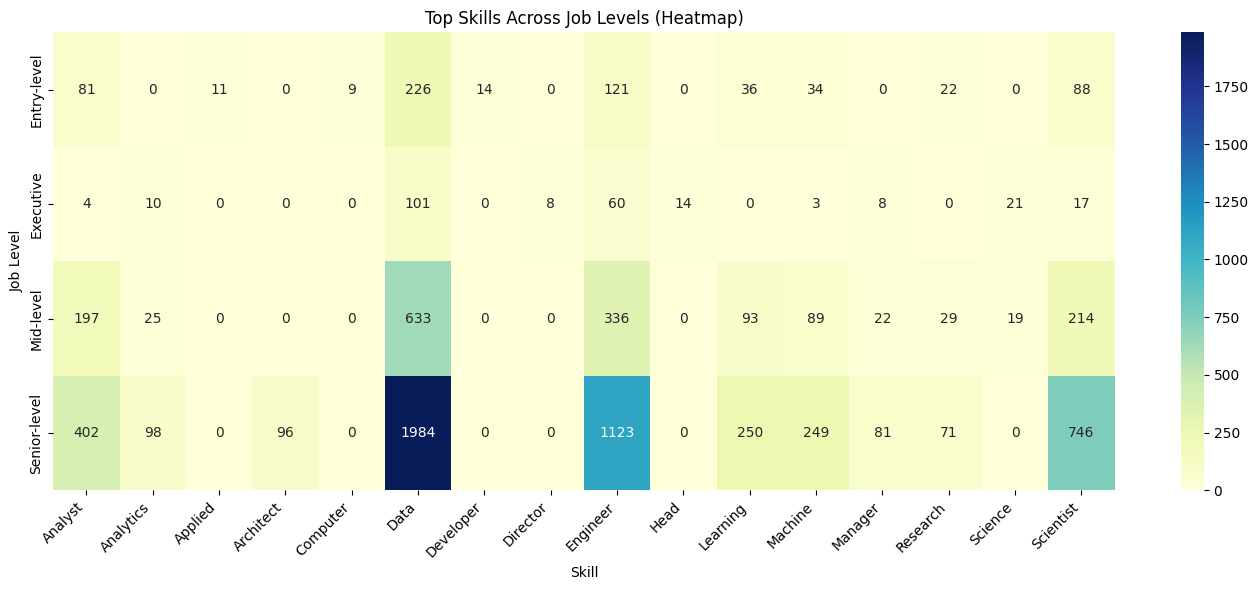

In [ ]:
# Day 7 Skill Trends Across Job Levels
# Install & Import Libraries
!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Mount Google Drive (Optional if your file is in Drive)
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
file_path = '/content/drive/MyDrive/data_science_salaries/ds_salaries.csv'  # Update path if needed
df = pd.read_csv(file_path)

# Inspect dataset
print(df.head())
print(df.columns)

# Map Experience Levels to Job Levels
level_mapping = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive'
}
df['job_level'] = df['experience_level'].map(level_mapping)

# Generate Skills from Job Titles
# Extract meaningful words
df['skills_list'] = df['job_title'].apply(lambda x: [w for w in x.split() if len(w) > 3])

# Count Skills per Job Level
level_skills = {}
for level in df['job_level'].unique():
    skills = sum(df[df['job_level'] == level]['skills_list'], [])
    level_skills[level] = Counter(skills).most_common(10)

# Convert to DataFrame for Visualization
skill_data = []
for level, skills in level_skills.items():
    for skill, count in skills:
        skill_data.append([level, skill, count])

skill_df = pd.DataFrame(skill_data, columns=['Job Level', 'Skill', 'Count'])
print(skill_df.head())

# Pivot the data for heatmap
heatmap_df = skill_df.pivot(index='Job Level', columns='Skill', values='Count').fillna(0)

# Create heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_df, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Top Skills Across Job Levels (Heatmap)')
plt.ylabel('Job Level')
plt.xlabel('Skill')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         1

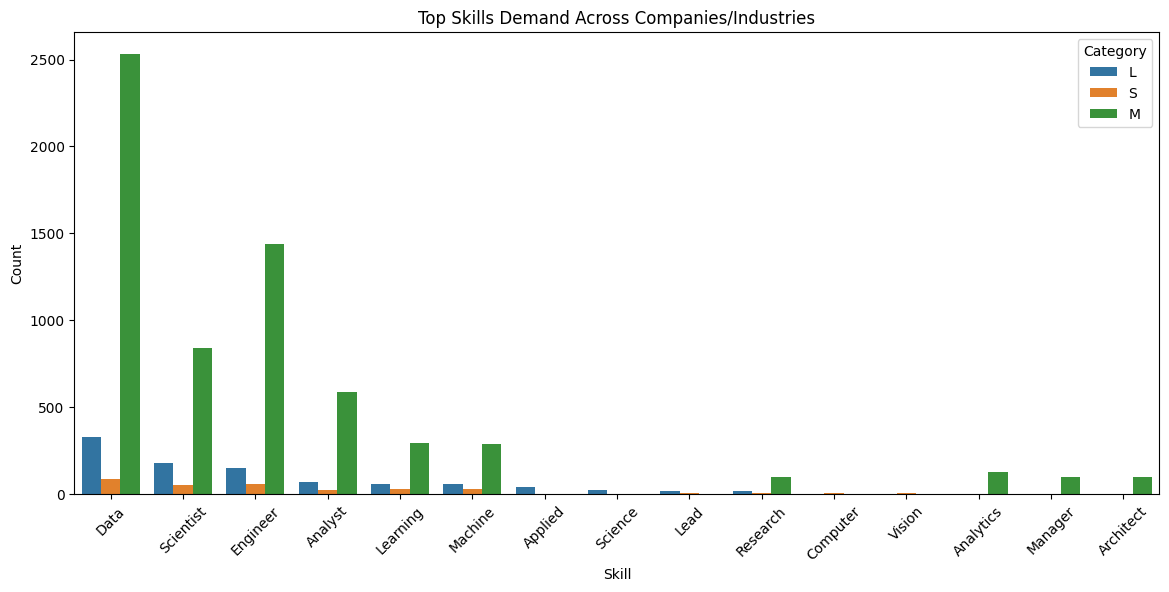

In [ ]:
#Day 8 Skill Demand Across Companies/Industries
# Install & Import Libraries
!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
file_path = '/content/drive/MyDrive/data_science_salaries/ds_salaries.csv'  # Update path if needed
df = pd.read_csv(file_path)

# STEP 4: Inspect Dataset
print(df.head())
print(df.columns)

# -----
# Assumption: Dataset has 'company_size' or 'company_location' or 'company' and 'job_title'
# If no company column exists, we will use 'company_size' or 'company_location' as proxy for industry
# -----

# Use job_title to extract proxy skills
df['skills_list'] = df['job_title'].apply(lambda x: [w for w in x.split() if len(w) > 3])

# Group Skills by Company or Industry
# Using 'company_size' as a proxy for company/industry comparison (Small/Medium/Large)
category_col = 'company_size'  # Change this to 'company_location' if needed

category_skills = {}
for category in df[category_col].unique():
    skills = sum(df[df[category_col] == category]['skills_list'], [])
    category_skills[category] = Counter(skills).most_common(10)

# Convert to DataFrame for Visualization
skill_data = []
for category, skills in category_skills.items():
    for skill, count in skills:
        skill_data.append([category, skill, count])

skill_df = pd.DataFrame(skill_data, columns=['Category', 'Skill', 'Count'])
print(skill_df.head())

# Multi-Category Comparison Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=skill_df, x='Skill', y='Count', hue='Category')
plt.xticks(rotation=45)
plt.title('Top Skills Demand Across Companies/Industries')
plt.show()
